In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [3]:
x_data_generated, y_data_generated = make_classification(scale=1)

In [4]:
x_data_generated[0]

array([ 0.95607296,  0.79431561,  0.06632269,  1.12840709, -0.17875524,
       -0.25240327, -1.08897285, -0.1717277 ,  0.78464694, -0.12941478,
        0.30229784,  0.77707848, -0.35565483, -0.6957207 ,  0.41294964,
        0.02138345,  1.05082142,  0.20577741,  1.02745688, -0.57961018])

In [5]:
X = x_data_generated
y = y_data_generated

In [8]:
# skf = StratifiedKFold(5, shuffle=True, random_state=1) - для несбалансированных классов.

kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(LogisticRegression(), X, y, cv=kf, scoring='accuracy').mean()

0.74

In [9]:
df = pd.DataFrame(X)
df['Target'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Target
0,0.956073,0.794316,0.066323,1.128407,-0.178755,-0.252403,-1.088973,-0.171728,0.784647,-0.129415,...,0.777078,-0.355655,-0.695721,0.412950,0.021383,1.050821,0.205777,1.027457,-0.579610,0
1,0.890187,-1.798588,-0.257090,-1.062394,1.444927,-0.625400,1.153566,0.206360,0.613566,-0.349264,...,-1.085647,-0.975446,-0.902726,-0.470575,0.785216,0.641356,0.937373,0.441115,0.206173,0
2,0.809262,0.525801,0.914883,-1.784580,1.976858,-0.972320,2.203009,0.330879,-0.878193,0.375100,...,-0.645349,0.620448,-0.966928,-2.113015,0.744393,0.326435,-1.553509,-1.419554,-0.429619,0
3,-1.090028,-1.102807,1.257973,2.462739,-3.907953,-0.406106,0.061506,-0.497909,0.422089,-2.118280,...,-1.396266,-0.008585,2.774050,-0.739984,0.258012,-1.611887,-0.631917,0.062640,0.207196,1
4,1.022964,-0.760294,0.088643,1.158939,-0.670197,-1.022253,1.011382,-0.193404,-0.468887,-1.438804,...,0.824443,0.842232,-0.120788,0.868467,0.874607,0.223349,-0.670263,0.215650,-0.057629,0


In [21]:
conf_matrix = df.corr()
conf_matrix_target = conf_matrix['Target'].sort_values(ascending=False)

In [22]:
conf_matrix_target

Target    1.000000
13        0.686809
14        0.212348
15        0.100087
1         0.092728
9         0.088338
3         0.069457
11        0.069385
2         0.066388
5         0.060528
12        0.058156
6         0.021280
8         0.019557
10        0.010789
18        0.007436
16       -0.032825
19       -0.096379
0        -0.097670
7        -0.165236
17       -0.217414
4        -0.587145
Name: Target, dtype: float64

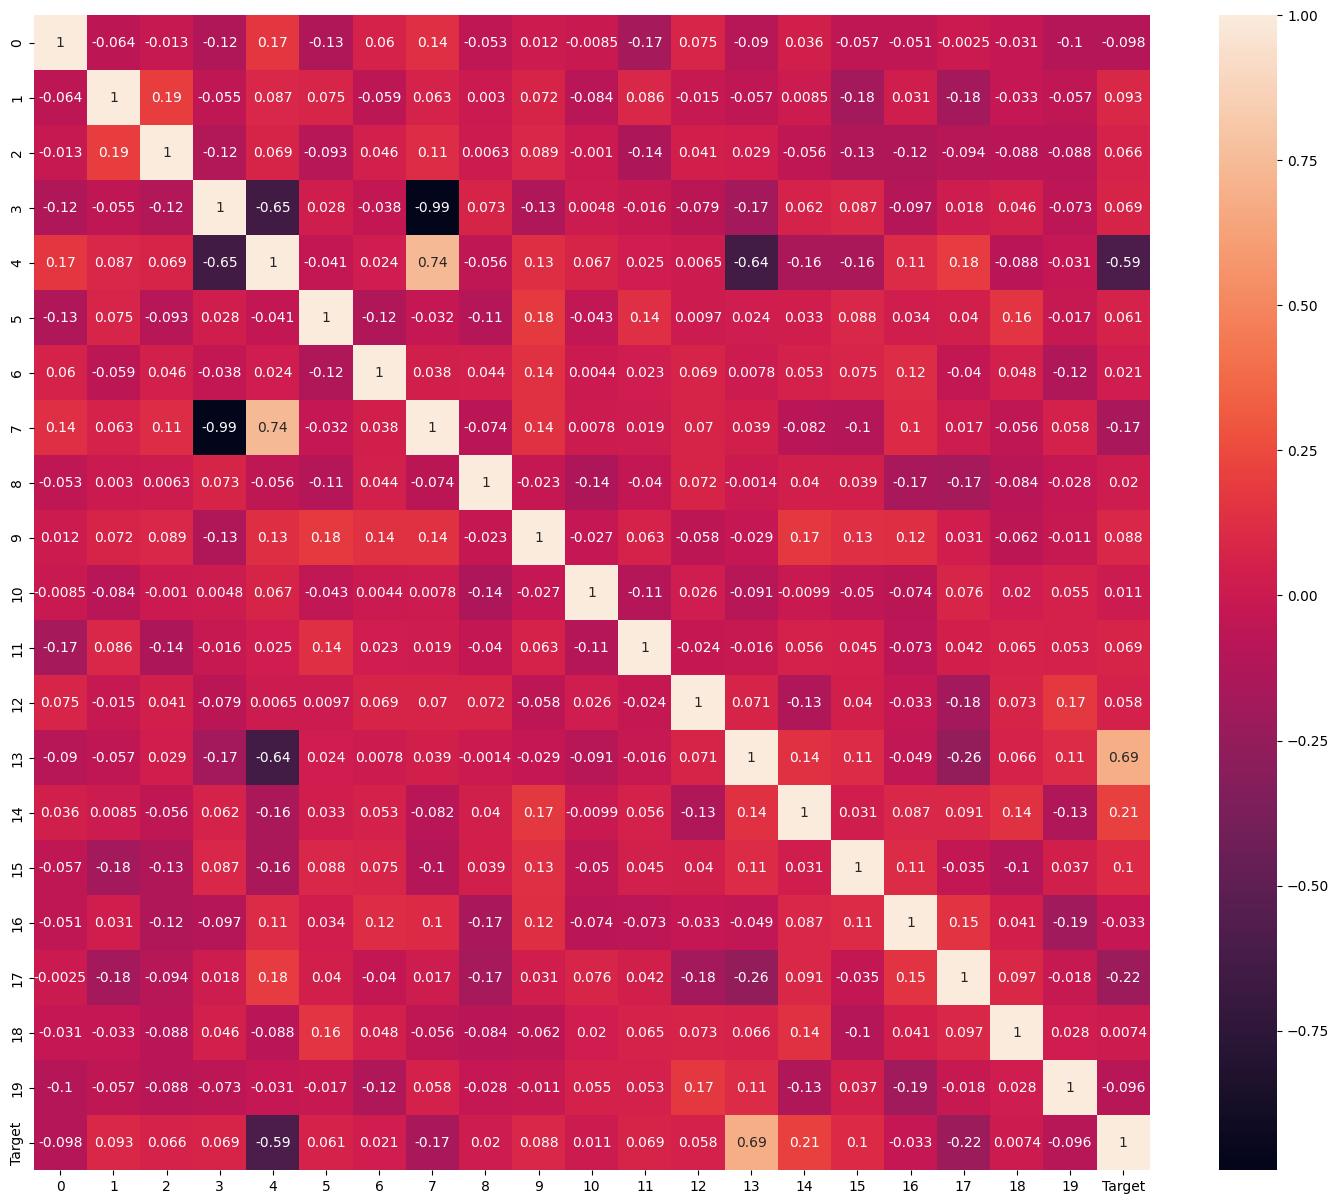

In [24]:
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix ,annot=True)
plt.show()


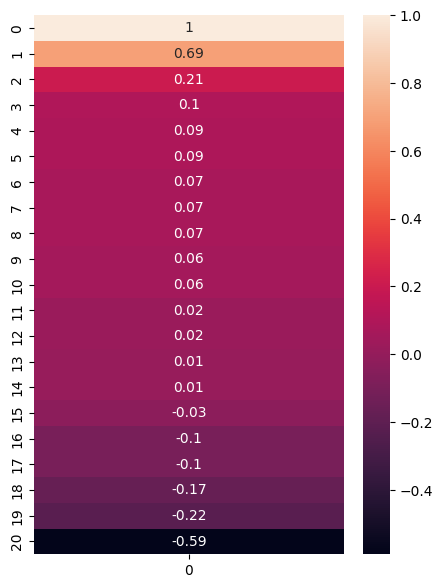

In [43]:
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix.iloc[-1,:].sort_values(ascending=False).values.reshape(-1, 1).round(2), annot=True)
plt.show()

In [52]:
feature_importance_heat_map = abs(conf_matrix.iloc[-1,:]).sort_values(ascending=False)
feature_importance_heat_map = feature_importance_heat_map.reset_index()
feature_importance_heat_map

,index,Target
0,Target,1.000000
1,13,0.686809
2,4,0.587145
3,17,0.217414
4,14,0.212348
5,7,0.165236
6,15,0.100087
7,0,0.097670
8,19,0.096379
9,1,0.092728


In [57]:
top_5_features = feature_importance_heat_map[feature_importance_heat_map['index'] != 'Target'].iloc[0:4]
top_5_features

,index,Target
1,13,0.686809
2,4,0.587145
3,17,0.217414
4,14,0.212348


In [72]:
X.shape

(100, 20)

In [65]:
list_top_5_feat = list(top_5_features['index'].values)
list_top_5_feat

[13, 4, 17, 14]

In [77]:
X_top_5 = X[:, [13, 4, 17, 14]]
X_top_5

array([[-6.95720697e-01, -1.78755238e-01,  2.05777406e-01,
         4.12949641e-01],
       [-9.02725739e-01,  1.44492682e+00,  9.37373224e-01,
        -4.70575185e-01],
       [-9.66927559e-01,  1.97685755e+00, -1.55350864e+00,
        -2.11301483e+00],
       [ 2.77404982e+00, -3.90795302e+00, -6.31916762e-01,
        -7.39983968e-01],
       [-1.20788188e-01, -6.70197258e-01, -6.70263279e-01,
         8.68466785e-01],
       [ 7.06460271e-01,  1.13964094e+00,  1.62767771e+00,
        -1.06301897e+00],
       [ 7.29045157e-01,  4.20775275e-01,  5.44849044e-01,
         5.09807755e-01],
       [-9.53597927e-01,  1.49051730e+00,  1.91555496e+00,
        -2.09186724e+00],
       [ 1.05765234e+00, -2.73674482e-01, -2.23955077e+00,
        -4.24597460e-01],
       [ 4.42114581e-01, -2.03550006e+00, -7.39042704e-01,
        -1.81102117e+00],
       [ 7.13732452e-01, -1.12123794e+00, -2.41354932e-01,
         5.88868212e-01],
       [-1.04528163e+00, -3.90929460e-01,  1.29893839e+00,
      

In [78]:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(LogisticRegression(), X_top_5, y, cv=kf, scoring='accuracy').mean()

0.85